In [1]:
!pip install joblib
!pip install seaborn
!pip install opencv-python

In [2]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import opendatasets as od
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import seaborn as sns

In [3]:
od.download("https://www.kaggle.com/datasets/gonzajl/neumona-x-rays-dataset")

df = pd.read_csv("data.csv")

Skipping, found downloaded files in "./neumona-x-rays-dataset" (use force=True to force download)


In [4]:
df.imagen.shape

(10498,)

In [5]:
df.imagen[0]

'dataset/neumonia/PNEUMONIA_3336.jpeg'

In [6]:
columnas = df.columns
clases = [col for col in columnas if col != "imagen"]

print("Clases existentes en el CSV:")
for clase in clases:
    print(clase)

Clases existentes en el CSV:
neumonia
no_neumonia


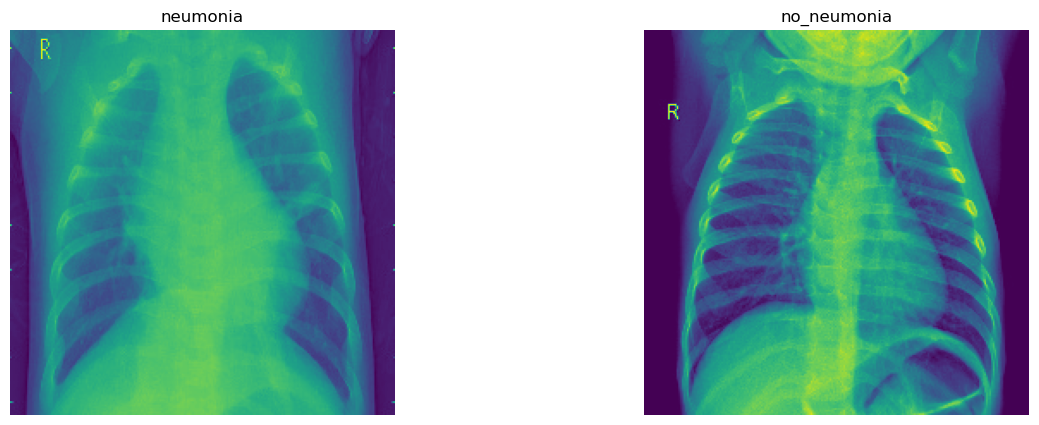

In [7]:
# Obtener las clases disponibles (todas las columnas excepto 'imagen')
clases = list(df.columns[1:])

# Crear una figura para mostrar las imágenes de ejemplo
fig = plt.figure(figsize=(15, 5))

for i, clase in enumerate(clases):
    filas_clase = df[df[clase] == 1]
    
    if not filas_clase.empty:
        fila_ejemplo = filas_clase.sample()
        direccion_imagen = fila_ejemplo["imagen"].values[0]
        imagen = cv2.imread(direccion_imagen, cv2.IMREAD_GRAYSCALE)
        if imagen is not None:
            ax = fig.add_subplot(1, len(clases), i + 1)
            ax.set_title(clase)
            ax.imshow(imagen)
            ax.axis('off')
        else:
            print("No se pudo cargar la imagen desde la ruta especificada:", direccion_imagen)
plt.show()

Precisión del modelo SVM: 0.9733333333333334


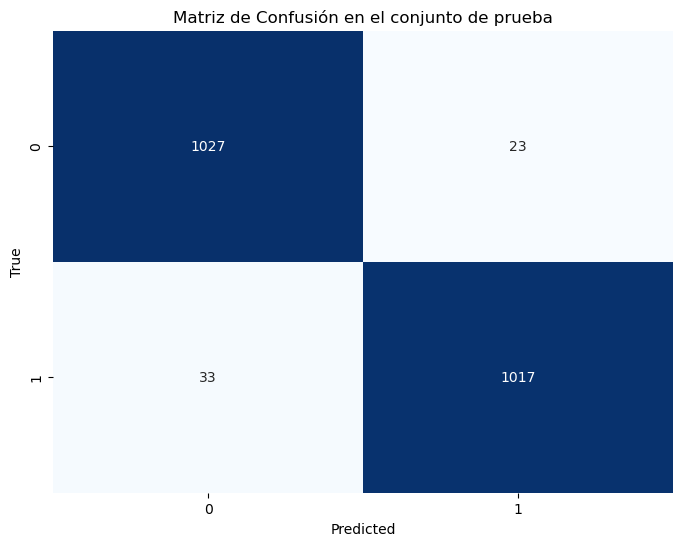


Métricas por Clase en el conjunto de prueba:
              precision    recall  f1-score   support

 no_neumonia       0.97      0.98      0.97      1050
    neumonia       0.98      0.97      0.97      1050

    accuracy                           0.97      2100
   macro avg       0.97      0.97      0.97      2100
weighted avg       0.97      0.97      0.97      2100



In [8]:
from sklearn.model_selection import train_test_split

# Preparo las imágenes para el modelo SVM de neumonía o no_neumonía
# Preparo listas para almacenar imágenes y etiquetas
imagenes = []
etiquetas = []

# Leer y procesar todas las imágenes
for i, fila in df.iterrows():
    if fila['neumonia'] == 1 or fila['no_neumonia'] == 1:
        ruta_imagen = fila['imagen']
        # Leer la imagen desde la ruta
        imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen_normalizada = (imagen / 255.0 * 255).astype('uint8')
        # Etiqueta según la categoría (neumonía o no_neumonía)
        imagenes.append(imagen_normalizada.flatten())
        if fila['neumonia'] == 1:
            etiquetas.append(1)
        elif fila['no_neumonia'] == 1:
            etiquetas.append(0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=123)

# Entrenar un modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", precision)

# Calcular la matriz de confusión en el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión en el conjunto de prueba')
plt.show()

# Obtener las métricas por clase en el conjunto de prueba
classification_rep = classification_report(y_test, y_pred, target_names=["no_neumonia", "neumonia"])

# Mostrar las métricas por clase en el conjunto de prueba
print("\nMétricas por Clase en el conjunto de prueba:")
print(classification_rep)

In [9]:
modelo_entrenado = svm_model

# Nombre del archivo en el que se guardará el modelo
nombre_archivo = 'modelo_neumonia.joblib'

# Exportar el modelo utilizando joblib
joblib.dump(modelo_entrenado, nombre_archivo)

['modelo_neumonia.joblib']